In [1]:
#We will be using MeteoStat API as it is free and can provide proper historical data on weather patterns

In [62]:
import pandas as pd
import time
from datetime import datetime
from meteostat import Point,Daily,Monthly

In [63]:
d2014=pd.read_csv('G:\ml notebooks\Road_RUL\datasets\datasets\d2014.csv')
d2015=pd.read_csv("G:\ml notebooks\Road_RUL\datasets\datasets\d2015_final.csv")
d2016=pd.read_csv("G:\ml notebooks\Road_RUL\datasets\datasets\d2016.csv")
d2017=pd.read_csv("G:\ml notebooks\Road_RUL\datasets\datasets\d2017.csv")


In [64]:

d2015.drop(['Unnamed: 0'],inplace=True,axis=1)
d2016.drop(['Unnamed: 0'],inplace=True,axis=1)
d2017.drop(['Unnamed: 0'],inplace=True,axis=1)
d2014.drop(['Unnamed: 0'],inplace=True,axis=1)
d2014['Year']=2014
d2015['Year']=2015
d2016['Year']=2016
d2017['Year']=2017



In [73]:
d2014.rename(columns={'Latitude':'Lat','Longitude':'Lon'},inplace=True)

In [178]:
def GetWeatherData(year,latitude,longitude):
    #Get the range of dates over which data will be collected
    start=datetime(year,1,1)
    end=datetime(year,12,31)
    
    #Get the coordinates i.e Lat and Lon
    place=Point(latitude,longitude)
    
    #Call the Monthly function which will provide us the weather data
    data=Monthly(place,start,end)
    data=data.fetch()
    
    #We drop tsun as it is most times not available and can deviate our results
    data.drop(['tsun'],inplace=True,axis=1)
    
    #We do Linear Interpolation to fill missing values as it time-series data,so imputation by 
    #mean would not be apt as it misinterprets data
    data=data.interpolate(method='linear')
    
    #Now lets return our required data, we take
    #Mean of average temperature of the months and windspeed
    #Summation of precipitation and sea level air pressure
    #Range of temperature is calculated and returned as well
    
    avgtemp=data['tavg'].mean()
    rangetemp=abs(abs(data['tmin'].median())-data['tmax'].median())
    totalprec=data['prcp'].sum()
    wind=data['wspd'].mean()
    totpres=data['pres'].sum()
    
    #return those values
    return avgtemp,rangetemp,totalprec,wind,totpres
    
    
    
    
    
    

In [179]:
#d2014,d2015,d2016 and d2017 datasets are our inputs
files=[d2014,d2015,d2016,d2017]

for dataset in files:
    
    dataset['AverageTemp']=0
    dataset['TempRange']=0
    dataset['Precipitation']=0
    dataset['WindSpeed']=0
    dataset['AirPressure']=0
    
    for i in dataset.index:
        weather=GetWeatherData(dataset['Year'][i],dataset['Lat'][i],dataset['Lon'][i])
        dataset['AverageTemp'][i],dataset['TempRange'][i],dataset['Precipitation'][i],dataset['WindSpeed'][i],dataset['AirPressure'][i]=weather
        
        
        

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#r

In [188]:
d2014.isna().sum()

DIR                      0
PCI                      0
DMI                      0
IRI                      0
Pavement_Section_From    0
Pavement_Section_To      0
Lat                      0
Lon                      0
Year                     0
AverageTemp              0
TempRange                0
Precipitation            0
WindSpeed                0
AirPressure              0
dtype: int64

We see that many missing values are present in WindSpeed, and after checking d2015,16 and 17, it is the same case,so we are going to drop it and since other fields are quite necessary, we will Impute them.

<Axes: >

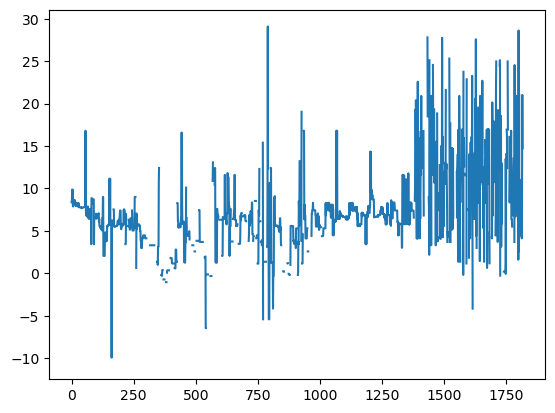

In [181]:
#Filling in missing values
import matplotlib.pyplot as plt
d2014['AverageTemp'].plot()

<Axes: >

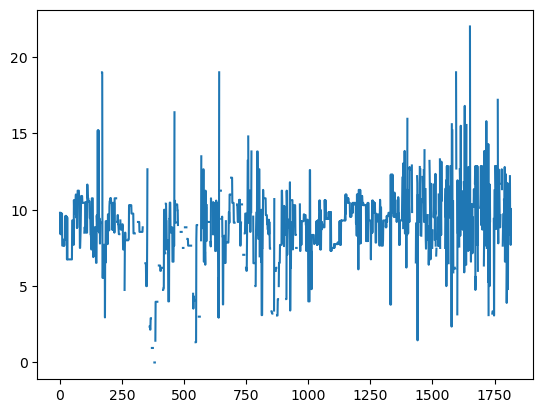

In [182]:
d2014['TempRange'].plot()

Any sort of imputation would probably be apt as from the plots, we see that most values are quite close to each other so mean or median imputation is good enough

In [183]:
import random

In [189]:
d2014['Precipitation'].describe()

count    1817.000000
mean     1040.499037
std       426.367082
min        47.000000
25%       787.200000
50%       944.800000
75%      1204.000000
max      2922.500000
Name: Precipitation, dtype: float64

In [190]:
for f in files:
    f['AverageTemp'].fillna(value=f['AverageTemp'].mean(),inplace=True)
    f['TempRange'].fillna(value=f['TempRange'].mean(),inplace=True)
    f['WindSpeed']=f['WindSpeed'].interpolate(method='linear')
    
    
    for val in f.index:
        if f['Precipitation'][val]==0:
            f['Precipitation'][val]=random.randrange(450,2400)
    
    

Due to lack of data, i had to randomly put values, Due to the use of Free APIs, i could not get quality data

In [191]:
from pathlib import Path
filepath1=Path('G:\ml notebooks\Road_RUL\datasets\datasets\d2014f.csv')
filepath2=Path('G:\ml notebooks\Road_RUL\datasets\datasets\d2015f.csv')
filepath3=Path('G:\ml notebooks\Road_RUL\datasets\datasets\d2016f.csv')
filepath4=Path('G:\ml notebooks\Road_RUL\datasets\datasets\d2017f.csv')
filepath1.parent.mkdir(parents=True,exist_ok=True)
filepath2.parent.mkdir(parents=True,exist_ok=True)
filepath3.parent.mkdir(parents=True,exist_ok=True)
filepath4.parent.mkdir(parents=True,exist_ok=True)



In [192]:
d2014.to_csv(filepath1)
d2015.to_csv(filepath2)
d2016.to_csv(filepath3)
d2017.to_csv(filepath4)


In [193]:
d2014

,DIR,PCI,DMI,IRI,Pavement_Section_From,Pavement_Section_To,Lat,Lon,Year,AverageTemp,TempRange,Precipitation,WindSpeed,AirPressure
0,E,85.74,8.97,1.17,FORT ERIE - GILMORE RD IC-5,FORT ERIE - CENTRAL AV IC,42.919138,-78.968180,2014,8.375000,9.80,1079.0,16.491667,12195.9
1,W,91.51,9.54,1.08,FORT ERIE - CENTRAL AV IC,FORT ERIE - GILMORE RD IC-5,42.909536,-78.918073,2014,8.375000,9.80,1079.0,16.491667,12195.9
2,E,89.05,9.09,0.87,NIAG FALLS - 1.0 KM W OF NETHERBY RD IC-12,GILMORE RD I/C,42.975538,-79.038586,2014,9.854545,8.40,1534.0,14.400000,0.0
3,W,88.16,9.03,0.91,GILMORE RD I/C,NIAG FALLS - 1.0 KM W OF NETHERBY RD IC-12,42.919210,-78.967961,2014,8.375000,9.80,1079.0,16.491667,12195.9
4,N,88.72,9.17,1.01,1.0 KM W OF NETHERBY RD I/C,NIAG FALLS - LYONS CK RD IC-21,42.975610,-79.038328,2014,9.854545,8.40,1261.0,14.400000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1812,B,79.81,8.65,1.57,ROBINS RD,END OF HWY,42.048074,-91.672911,2014,7.441667,12.20,979.0,16.600000,12196.4
1813,B,92.02,9.83,1.36,OKE DR,END OF HWY,45.636451,-79.413469,2014,4.125000,8.45,1644.8,15.370833,0.0
1814,B,91.95,9.63,1.13,ONTARIO ST IC,END OF HWY,41.799060,-71.422014,2014,10.533333,10.00,1195.0,14.141667,12196.7
1815,B,87.60,8.93,0.87,LAKE FOREST DR,HWY 559,33.629013,-117.717311,2014,21.020000,7.70,2371.0,7.600000,0.0


In [194]:
d2015.head(50)

,DIR,PCI,DMI,IRI,Pavement_Section_From,Pavement_Section_To,Lat,Lon,Year,AverageTemp,TempRange,Precipitation,WindSpeed,AirPressure
0,E,85.00,8.89,1.17,FORT ERIE - CENTRAL AV IC,FORT ERIE - GILMORE RD IC-5,42.909536,-78.918073,2015,9.458333,9.15,936.00,16.266667,11174.85
1,W,85.13,8.83,1.08,FORT ERIE - CENTRAL AV IC,FORT ERIE - GILMORE RD IC-5,42.909536,-78.918073,2015,9.458333,9.15,936.00,16.266667,11174.85
2,E,80.84,8.18,0.87,GILMORE RD I/C,NIAG FALLS - 1.0 KM W OF NETHERBY RD IC-12,42.919210,-78.967961,2015,9.458333,9.15,936.00,16.266667,11174.85
3,W,79.18,8.03,0.91,GILMORE RD I/C,NIAG FALLS - 1.0 KM W OF NETHERBY RD IC-12,42.919210,-78.967961,2015,9.458333,9.15,936.00,16.266667,11174.85
4,N,81.24,8.34,1.01,1.0 KM W OF NETHERBY RD I/C,NIAG FALLS - LYONS CK RD IC-21,43.032582,-79.112933,2015,9.341667,9.50,884.10,15.818182,11171.20
5,S,81.86,8.26,0.83,1.0 KM W OF NETHERBY RD I/C,NIAG FALLS - LYONS CK RD IC-21,43.032582,-79.112933,2015,9.341667,9.50,884.10,15.818182,11171.20
6,N,86.61,8.77,0.81,NIAG FALLS - LYONS CK RD IC-21,NIAG FALLS - HWY 420 IC-30,43.096796,-79.119138,2015,9.566667,8.70,854.80,15.872727,9127.35
7,S,86.00,8.72,0.83,NIAG FALLS - LYONS CK RD IC-21,NIAG FALLS - HWY 420 IC-30,43.096796,-79.119138,2015,9.566667,8.70,854.80,15.872727,9127.35
8,N,86.21,8.91,1.03,NIAG FALLS - HWY 420 IC-30,MOUNTAIN RD IC-34,43.134903,-79.131686,2015,9.741667,7.55,854.80,15.509091,9127.35
9,S,83.45,8.82,1.29,NIAG FALLS - HWY 420 IC-30,MOUNTAIN RD IC-34,43.134903,-79.131686,2015,9.741667,7.55,854.80,15.509091,9127.35
